In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sns
import sklearn.metrics as sk

In [42]:
data=pd.read_csv('loan-data-preprocessed.csv')
data

,id,loan_amnt_USD,loan_amnt_EUR,funded_amnt_USD,funded_amnt_EUR,int_rate_USD,int_rate_EUR,installment,total_pymnt_USD,total_pymnt_EUR,exchange_rate,issue_date,loan_status,term_months,sub_grade,verification_status,state_address
0,373332,9950,9038.082814,1000,908.350032,18.25,16.577388,360.97,1072.82,974.496081,1.100897,10,1,36,21,0,0.1825
1,575239,12000,10900.200380,12000,10900.200380,20.99,19.066267,324.58,959.75,871.788943,1.100897,10,1,60,25,1,0.2099
2,707689,10000,8924.299805,10000,8924.299805,13.66,12.190594,340.13,3726.25,3325.417215,1.120536,2,1,36,13,1,0.1366
3,709828,27200,24707.120860,27200,24707.120860,28.99,26.333067,553.87,41913.62,38072.238050,1.100897,10,1,60,6,0,0.2899
4,849994,11400,10526.076490,11400,10526.076490,28.99,26.767628,376.09,3753.60,3465.849185,1.083025,3,0,36,10,0,0.2899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,68603178,14000,12804.119630,14000,12804.119630,28.99,26.513673,421.61,41913.62,38333.357470,1.093398,12,1,36,1,0,0.2899
9996,68604253,20000,18291.599470,20000,18291.599470,28.99,26.513673,631.26,0.00,0.000000,1.093398,12,1,36,6,0,0.2899
9997,68614880,5600,5121.647852,5600,5121.647852,28.99,26.513673,180.18,0.00,0.000000,1.093398,12,1,36,8,1,0.2899
9998,68615915,4000,3658.319894,4000,3658.319894,28.99,26.513673,131.87,0.00,0.000000,1.093398,12,1,36,10,1,0.2899


In [43]:
data.shape

(10000, 17)

In [44]:
data.head()


,id,loan_amnt_USD,loan_amnt_EUR,funded_amnt_USD,funded_amnt_EUR,int_rate_USD,int_rate_EUR,installment,total_pymnt_USD,total_pymnt_EUR,exchange_rate,issue_date,loan_status,term_months,sub_grade,verification_status,state_address
0,373332,9950,9038.082814,1000,908.350032,18.25,16.577388,360.97,1072.82,974.496081,1.100897,10,1,36,21,0,0.1825
1,575239,12000,10900.200380,12000,10900.200380,20.99,19.066267,324.58,959.75,871.788943,1.100897,10,1,60,25,1,0.2099
2,707689,10000,8924.299805,10000,8924.299805,13.66,12.190594,340.13,3726.25,3325.417215,1.120536,2,1,36,13,1,0.1366
3,709828,27200,24707.120860,27200,24707.120860,28.99,26.333067,553.87,41913.62,38072.238050,1.100897,10,1,60,6,0,0.2899
4,849994,11400,10526.076490,11400,10526.076490,28.99,26.767628,376.09,3753.60,3465.849185,1.083025,3,0,36,10,0,0.2899


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   loan_amnt_USD        10000 non-null  int64  
 2   loan_amnt_EUR        10000 non-null  float64
 3   funded_amnt_USD      10000 non-null  int64  
 4   funded_amnt_EUR      10000 non-null  float64
 5   int_rate_USD         10000 non-null  float64
 6   int_rate_EUR         10000 non-null  float64
 7   installment          10000 non-null  float64
 8   total_pymnt_USD      10000 non-null  float64
 9   total_pymnt_EUR      10000 non-null  float64
 10  exchange_rate        10000 non-null  float64
 11  issue_date           10000 non-null  int64  
 12  loan_status          10000 non-null  int64  
 13  term_months          10000 non-null  int64  
 14  sub_grade            10000 non-null  int64  
 15  verification_status  10000 non-null  

In [46]:
data.describe()

,id,loan_amnt_USD,loan_amnt_EUR,funded_amnt_USD,funded_amnt_EUR,int_rate_USD,int_rate_EUR,installment,total_pymnt_USD,total_pymnt_EUR,exchange_rate,issue_date,loan_status,term_months,sub_grade,verification_status,state_address
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.401581e+07,16259.790000,14726.151412,14595.490000,13218.100157,24.045867,21.779747,487.617775,5082.339394,4592.108894,1.104457,6.637700,0.931300,44.925600,12.010200,0.682700,0.240459
std,9.416985e+06,9357.537203,8481.317004,8881.666113,8046.543906,6.342354,5.764019,310.934000,9398.984256,8513.710233,0.020573,3.678259,0.252956,11.600066,6.523324,0.465449,0.063424
min,3.733320e+05,1000.000000,881.829995,1000.000000,881.829995,6.000000,5.450100,31.420000,0.000000,0.000000,1.058302,0.000000,0.000000,36.000000,1.000000,0.000000,0.060000
25%,4.628504e+07,9000.000000,8250.870048,8000.000000,7138.010831,17.570000,15.638261,271.140000,938.060000,853.793002,1.093924,4.000000,1.000000,36.000000,7.000000,0.000000,0.175700
50%,5.542314e+07,15000.000000,13228.740530,13000.000000,11764.914880,28.990000,25.755295,400.240000,2109.600000,1900.374748,1.100897,7.000000,1.000000,36.000000,11.000000,1.000000,0.289900
75%,6.184264e+07,22000.000000,19983.700700,20000.000000,18282.799010,28.990000,26.449897,621.180000,4296.252500,3859.335980,1.122297,10.000000,1.000000,60.000000,16.000000,1.000000,0.289900
max,6.861652e+07,35000.000000,33071.851330,35000.000000,33071.851330,28.990000,27.392942,1372.970000,41913.620000,39604.600260,1.134005,12.000000,1.000000,60.000000,36.000000,1.000000,0.289900


In [47]:
pd.crosstab(data['verification_status'],data['loan_status'],margins=True)

loan_status,0,1,All
verification_status,,,
0,187,2986,3173
1,500,6327,6827
All,687,9313,10000


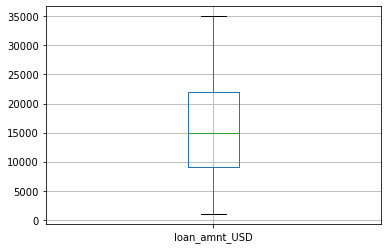

In [48]:
data.boxplot(column='loan_amnt_USD')

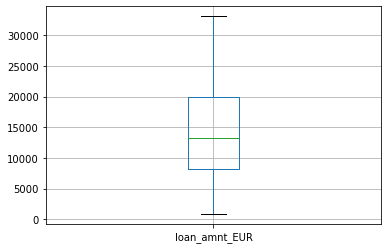

In [49]:
data.boxplot(column='loan_amnt_EUR')

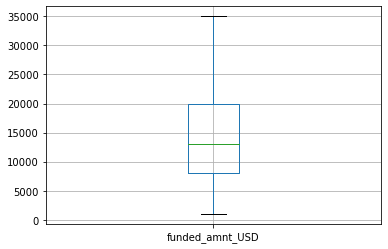

In [50]:
data.boxplot(column='funded_amnt_USD')

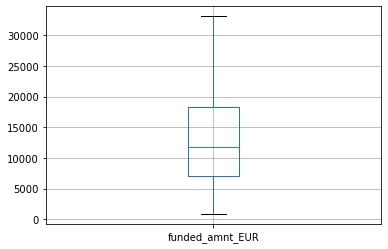

In [51]:
data.boxplot(column='funded_amnt_EUR')

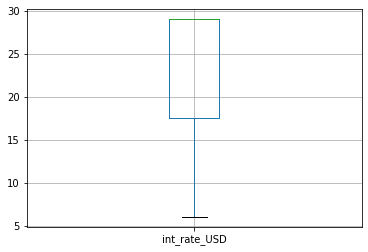

In [52]:
data.boxplot(column='int_rate_USD')

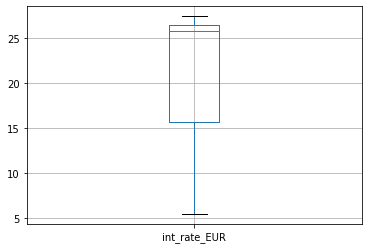

In [53]:
data.boxplot(column='int_rate_EUR')

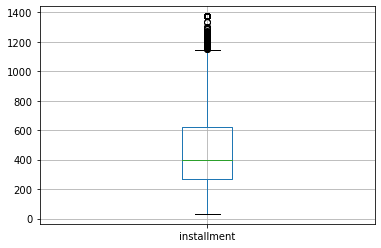

In [54]:
data.boxplot(column='installment')

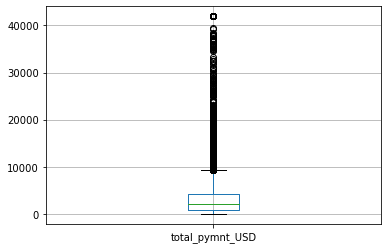

In [55]:
data.boxplot(column='total_pymnt_USD')

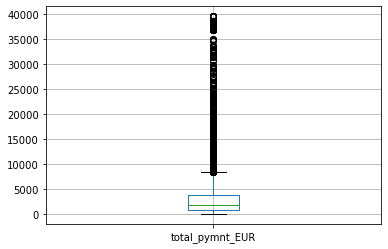

In [56]:
data.boxplot(column='total_pymnt_EUR')

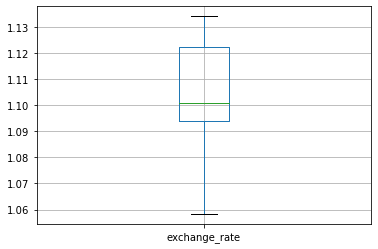

In [57]:
data.boxplot(column='exchange_rate')

In [58]:
quantile_95=data['total_pymnt_EUR'].quantile(0.95)
quantile_95

36960.6873

In [59]:
data[data['total_pymnt_EUR']>quantile_95]


,id,loan_amnt_USD,loan_amnt_EUR,funded_amnt_USD,funded_amnt_EUR,int_rate_USD,int_rate_EUR,installment,total_pymnt_USD,total_pymnt_EUR,exchange_rate,issue_date,loan_status,term_months,sub_grade,verification_status,state_address
3,709828,27200,24707.120860,27200,24707.120860,28.99,26.333067,553.87,41913.62,38072.23805,1.100897,10,1,60,6,0,0.2899
14,14470171,21000,18894.539950,21000,18894.539950,28.99,26.083463,687.42,41913.62,37711.36035,1.111432,4,1,36,9,1,0.2899
17,15389420,15000,13850.100640,15000,13850.100640,13.99,12.917527,348.95,41913.62,38700.52369,1.083025,3,0,60,14,1,0.1399
49,37621803,4700,4163.730260,4700,4163.730260,28.99,25.682243,150.54,41913.62,37131.27828,1.128796,1,1,36,7,0,0.2899
81,37927296,10000,8859.000554,10000,8859.000554,21.99,19.480942,276.14,41913.62,37131.27828,1.128796,1,1,60,25,1,0.2199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9947,68474367,26000,23779.079310,26000,23779.079310,28.99,26.513673,848.51,41913.62,38333.35747,1.093398,12,1,36,9,1,0.2899
9987,68577614,6000,5487.479841,6000,5487.479841,28.99,26.513673,191.28,41913.62,38333.35747,1.093398,12,1,36,7,0,0.2899
9988,68577640,12000,10974.959680,12000,10974.959680,15.77,14.422926,420.53,41913.62,38333.35747,1.093398,12,1,36,16,1,0.1577
9993,68594953,10000,9145.799735,10000,9145.799735,28.99,26.513673,329.67,41913.62,38333.35747,1.093398,12,1,36,10,1,0.2899


In [60]:
quantile_0_05=data['total_pymnt_EUR'].quantile(0.05)
quantile_0_05

147.7869779

In [61]:
data[data['total_pymnt_EUR']<quantile_0_05]

,id,loan_amnt_USD,loan_amnt_EUR,funded_amnt_USD,funded_amnt_EUR,int_rate_USD,int_rate_EUR,installment,total_pymnt_USD,total_pymnt_EUR,exchange_rate,issue_date,loan_status,term_months,sub_grade,verification_status,state_address
873,40307781,10000,9145.799735,10000,9145.799735,28.99,26.513673,321.55,0.00,0.000000,1.093398,12,1,36,8,1,0.2899
1485,41750150,3050,2816.187131,3050,2816.187131,28.99,26.767628,101.73,0.00,0.000000,1.083025,3,0,36,11,0,0.2899
3040,48040248,19750,18019.505330,19750,18019.505330,19.52,17.809658,518.00,0.00,0.000000,1.096035,5,0,60,23,1,0.1952
3330,49038022,13075,11929.368720,13075,11929.368720,22.99,20.975617,368.52,0.00,0.000000,1.096035,5,0,60,27,1,0.2299
5368,56089343,1000,881.829995,1000,881.829995,28.99,25.564252,32.74,163.09,143.817654,1.134005,8,1,36,9,0,0.2899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,68595397,7200,6584.975809,7200,6584.975809,28.99,26.513673,229.53,0.00,0.000000,1.093398,12,0,36,7,1,0.2899
9996,68604253,20000,18291.599470,20000,18291.599470,28.99,26.513673,631.26,0.00,0.000000,1.093398,12,1,36,6,0,0.2899
9997,68614880,5600,5121.647852,5600,5121.647852,28.99,26.513673,180.18,0.00,0.000000,1.093398,12,1,36,8,1,0.2899
9998,68615915,4000,3658.319894,4000,3658.319894,28.99,26.513673,131.87,0.00,0.000000,1.093398,12,1,36,10,1,0.2899


In [62]:
data[(data['total_pymnt_EUR']<quantile_95) & (data['total_pymnt_EUR']>quantile_0_05)]

,id,loan_amnt_USD,loan_amnt_EUR,funded_amnt_USD,funded_amnt_EUR,int_rate_USD,int_rate_EUR,installment,total_pymnt_USD,total_pymnt_EUR,exchange_rate,issue_date,loan_status,term_months,sub_grade,verification_status,state_address
0,373332,9950,9038.082814,1000,908.350032,18.25,16.577388,360.97,1072.82,974.496081,1.100897,10,1,36,21,0,0.1825
1,575239,12000,10900.200380,12000,10900.200380,20.99,19.066267,324.58,959.75,871.788943,1.100897,10,1,60,25,1,0.2099
2,707689,10000,8924.299805,10000,8924.299805,13.66,12.190594,340.13,3726.25,3325.417215,1.120536,2,1,36,13,1,0.1366
4,849994,11400,10526.076490,11400,10526.076490,28.99,26.767628,376.09,3753.60,3465.849185,1.083025,3,0,36,10,0,0.2899
5,1312426,15000,13496.099960,15000,13496.099960,15.61,14.044941,361.67,2880.35,2591.566102,1.111432,4,1,60,16,1,0.1561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9860,67989735,10000,9145.799735,10000,9145.799735,28.99,26.513673,334.97,292.99,267.962786,1.093398,12,1,36,12,1,0.2899
9885,68182493,10000,9145.799735,10000,9145.799735,28.99,26.513673,202.34,171.57,156.914486,1.093398,12,1,60,5,0,0.2899
9935,68433369,10000,9145.799735,10000,9145.799735,28.99,26.513673,312.95,10002.60,9148.177643,1.093398,12,1,36,5,0,0.2899
9940,68443928,14000,12804.119630,14000,12804.119630,28.99,26.513673,432.22,377.85,345.574043,1.093398,12,1,36,3,0,0.2899


In [63]:
quantile__95=data['installment'].quantile(0.95)
quantile__95

1372.97

In [64]:
data[data['installment']>quantile__95]

,id,loan_amnt_USD,loan_amnt_EUR,funded_amnt_USD,funded_amnt_EUR,int_rate_USD,int_rate_EUR,installment,total_pymnt_USD,total_pymnt_EUR,exchange_rate,issue_date,loan_status,term_months,sub_grade,verification_status,state_address


In [65]:
quantile__0_05=data['installment'].quantile(0.05)
quantile__0_05

134.18

In [66]:
data[data['installment']<quantile__0_05]

,id,loan_amnt_USD,loan_amnt_EUR,funded_amnt_USD,funded_amnt_EUR,int_rate_USD,int_rate_EUR,installment,total_pymnt_USD,total_pymnt_EUR,exchange_rate,issue_date,loan_status,term_months,sub_grade,verification_status,state_address
95,38108327,1200,1063.080066,1200,1063.080066,13.66,12.101395,40.82,488.02,432.336945,1.128796,1,0,36,13,1,0.1366
131,38311693,2500,2214.750138,2500,2214.750138,28.99,25.682243,80.08,718.08,636.147112,1.128796,1,0,36,7,1,0.2899
163,38428667,3500,3100.650194,3500,3100.650194,28.99,25.682243,116.24,1276.31,1130.683100,1.128796,1,1,36,10,1,0.2899
165,38429497,1500,1328.850083,1500,1328.850083,28.99,25.682243,50.54,604.32,535.367122,1.128796,1,1,36,12,0,0.2899
168,38434338,1000,885.900055,1000,885.900055,15.99,14.165542,35.16,420.14,372.202049,1.128796,1,1,36,17,0,0.1599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,68403874,3725,3406.810401,3725,3406.810401,28.99,26.513673,122.81,0.00,0.000000,1.093398,12,1,36,10,1,0.2899
9934,68426029,3525,3223.894407,3525,3223.894407,28.99,26.513673,116.21,0.00,0.000000,1.093398,12,1,36,10,0,0.2899
9953,68493593,4000,3658.319894,4000,3658.319894,28.99,26.513673,122.58,0.00,0.000000,1.093398,12,1,36,2,0,0.2899
9982,68566571,3600,3292.487905,3600,3292.487905,28.99,26.513673,118.68,0.00,0.000000,1.093398,12,1,36,10,1,0.2899


In [67]:
data[(data['installment']<quantile__95) & (data['installment']>quantile__0_05)]

,id,loan_amnt_USD,loan_amnt_EUR,funded_amnt_USD,funded_amnt_EUR,int_rate_USD,int_rate_EUR,installment,total_pymnt_USD,total_pymnt_EUR,exchange_rate,issue_date,loan_status,term_months,sub_grade,verification_status,state_address
0,373332,9950,9038.082814,1000,908.350032,18.25,16.577388,360.97,1072.82,974.496081,1.100897,10,1,36,21,0,0.1825
1,575239,12000,10900.200380,12000,10900.200380,20.99,19.066267,324.58,959.75,871.788943,1.100897,10,1,60,25,1,0.2099
2,707689,10000,8924.299805,10000,8924.299805,13.66,12.190594,340.13,3726.25,3325.417215,1.120536,2,1,36,13,1,0.1366
3,709828,27200,24707.120860,27200,24707.120860,28.99,26.333067,553.87,41913.62,38072.238050,1.100897,10,1,60,6,0,0.2899
4,849994,11400,10526.076490,11400,10526.076490,28.99,26.767628,376.09,3753.60,3465.849185,1.083025,3,0,36,10,0,0.2899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,68595397,7200,6584.975809,7200,6584.975809,28.99,26.513673,229.53,0.00,0.000000,1.093398,12,0,36,7,1,0.2899
9995,68603178,14000,12804.119630,14000,12804.119630,28.99,26.513673,421.61,41913.62,38333.357470,1.093398,12,1,36,1,0,0.2899
9996,68604253,20000,18291.599470,20000,18291.599470,28.99,26.513673,631.26,0.00,0.000000,1.093398,12,1,36,6,0,0.2899
9997,68614880,5600,5121.647852,5600,5121.647852,28.99,26.513673,180.18,0.00,0.000000,1.093398,12,1,36,8,1,0.2899


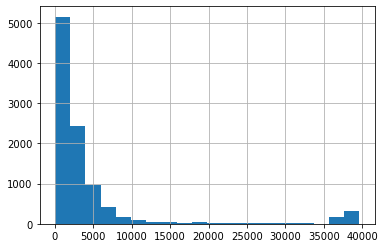

In [68]:
data['total_pymnt_EUR'].hist(bins=20)

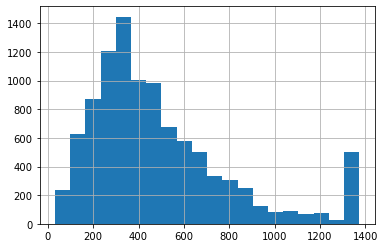

In [69]:
data['installment'].hist(bins=20)

In [70]:
min_threshold,max_threshold=data.total_pymnt_EUR.quantile([0.001,0.999])
min_threshold,max_threshold

(0.0, 39604.60026)

In [71]:
data[data.total_pymnt_EUR<min_threshold]
data[data.total_pymnt_EUR> max_threshold]

,id,loan_amnt_USD,loan_amnt_EUR,funded_amnt_USD,funded_amnt_EUR,int_rate_USD,int_rate_EUR,installment,total_pymnt_USD,total_pymnt_EUR,exchange_rate,issue_date,loan_status,term_months,sub_grade,verification_status,state_address


In [72]:
data_new=data[(data.total_pymnt_EUR < max_threshold)& (data.total_pymnt_EUR)>min_threshold]
data_new

,id,loan_amnt_USD,loan_amnt_EUR,funded_amnt_USD,funded_amnt_EUR,int_rate_USD,int_rate_EUR,installment,total_pymnt_USD,total_pymnt_EUR,exchange_rate,issue_date,loan_status,term_months,sub_grade,verification_status,state_address
0,373332,9950,9038.082814,1000,908.350032,18.25,16.577388,360.97,1072.82,974.496081,1.100897,10,1,36,21,0,0.1825
1,575239,12000,10900.200380,12000,10900.200380,20.99,19.066267,324.58,959.75,871.788943,1.100897,10,1,60,25,1,0.2099
2,707689,10000,8924.299805,10000,8924.299805,13.66,12.190594,340.13,3726.25,3325.417215,1.120536,2,1,36,13,1,0.1366
3,709828,27200,24707.120860,27200,24707.120860,28.99,26.333067,553.87,41913.62,38072.238050,1.100897,10,1,60,6,0,0.2899
4,849994,11400,10526.076490,11400,10526.076490,28.99,26.767628,376.09,3753.60,3465.849185,1.083025,3,0,36,10,0,0.2899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,68576147,12000,10974.959680,12000,10974.959680,28.99,26.513673,266.88,186.95,170.980726,1.093398,12,1,60,11,0,0.2899
9987,68577614,6000,5487.479841,6000,5487.479841,28.99,26.513673,191.28,41913.62,38333.357470,1.093398,12,1,36,7,0,0.2899
9988,68577640,12000,10974.959680,12000,10974.959680,15.77,14.422926,420.53,41913.62,38333.357470,1.093398,12,1,36,16,1,0.1577
9993,68594953,10000,9145.799735,10000,9145.799735,28.99,26.513673,329.67,41913.62,38333.357470,1.093398,12,1,36,10,1,0.2899


In [73]:
data_new.shape

(9565, 17)

C:\Users\aa\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


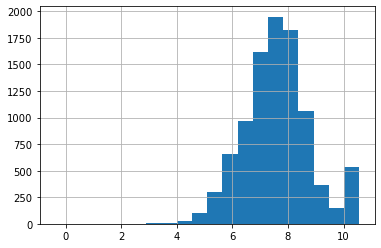

In [81]:
data_new['total_pymnt_EUR_log']=np.log(data_new['total_pymnt_EUR'])
data_new['total_pymnt_EUR_log'].hist(bins=20)

In [93]:
pd.isnull(data).sum()

id                     0
loan_amnt_USD          0
loan_amnt_EUR          0
funded_amnt_USD        0
funded_amnt_EUR        0
int_rate_USD           0
int_rate_EUR           0
installment            0
total_pymnt_USD        0
total_pymnt_EUR        0
exchange_rate          0
issue_date             0
loan_status            0
term_months            0
sub_grade              0
verification_status    0
state_address          0
dtype: int64

In [160]:
X=data.iloc[:,np.r_[1:11,13:17]].values
y=data.iloc[:,np.r_[:,12]].values
y1=data.iloc[:,np.r_[:,15]].values

In [154]:
X

array([[9.95000000e+03, 9.03808281e+03, 1.00000000e+03, ...,
        2.10000000e+01, 0.00000000e+00, 1.82500000e-01],
       [1.20000000e+04, 1.09002004e+04, 1.20000000e+04, ...,
        2.50000000e+01, 1.00000000e+00, 2.09900000e-01],
       [1.00000000e+04, 8.92429981e+03, 1.00000000e+04, ...,
        1.30000000e+01, 1.00000000e+00, 1.36600000e-01],
       ...,
       [5.60000000e+03, 5.12164785e+03, 5.60000000e+03, ...,
        8.00000000e+00, 1.00000000e+00, 2.89900000e-01],
       [4.00000000e+03, 3.65831989e+03, 4.00000000e+03, ...,
        1.00000000e+01, 1.00000000e+00, 2.89900000e-01],
       [2.16000000e+04, 1.97549274e+04, 2.16000000e+04, ...,
        3.00000000e+00, 0.00000000e+00, 2.89900000e-01]])

In [159]:
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [162]:
y1

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [164]:
from sklearn.model_selection import train_test_split

In [167]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [169]:
print(X_train)

[[3.50000000e+04 3.17922511e+04 3.50000000e+04 ... 1.10000000e+01
  1.00000000e+00 2.89900000e-01]
 [7.00000000e+03 6.40205981e+03 7.00000000e+03 ... 1.20000000e+01
  1.00000000e+00 2.89900000e-01]
 [8.00000000e+03 7.29904013e+03 8.00000000e+03 ... 1.70000000e+01
  0.00000000e+00 1.65500000e-01]
 ...
 [9.60000000e+03 8.68238720e+03 9.60000000e+03 ... 1.30000000e+01
  0.00000000e+00 1.33300000e-01]
 [3.20000000e+04 2.92665592e+04 3.20000000e+04 ... 1.00000000e+01
  0.00000000e+00 2.89900000e-01]
 [1.60000000e+04 1.43958400e+04 1.60000000e+04 ... 1.00000000e+01
  1.00000000e+00 2.89900000e-01]]


In [172]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [177]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
DTClassifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [179]:
y_pred=DTClassifier.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [183]:
from sklearn import metrics
print('The accuracy of decision tree is:',metrics.accuracy_score(y_pred,y_test))

The accuracy of decision tree is: 0.8625


In [188]:
from sklearn.naive_bayes import GaussianNB
NBClassifier=GaussianNB()
NBClassifier.fit(X_train,y_train)

C:\Users\aa\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [190]:
y_pred=NBClassifier.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [192]:
print("The accuracy of Naive Bayes is:",metrics.accuracy_score(y_pred,y_test))

The accuracy of Naive Bayes is: 0.932


In [199]:
data.head()

,id,loan_amnt_USD,loan_amnt_EUR,funded_amnt_USD,funded_amnt_EUR,int_rate_USD,int_rate_EUR,installment,total_pymnt_USD,total_pymnt_EUR,exchange_rate,issue_date,loan_status,term_months,sub_grade,verification_status,state_address
0,373332,9950,9038.082814,1000,908.350032,18.25,16.577388,360.97,1072.82,974.496081,1.100897,10,1,36,21,0,0.1825
1,575239,12000,10900.200380,12000,10900.200380,20.99,19.066267,324.58,959.75,871.788943,1.100897,10,1,60,25,1,0.2099
2,707689,10000,8924.299805,10000,8924.299805,13.66,12.190594,340.13,3726.25,3325.417215,1.120536,2,1,36,13,1,0.1366
3,709828,27200,24707.120860,27200,24707.120860,28.99,26.333067,553.87,41913.62,38072.238050,1.100897,10,1,60,6,0,0.2899
4,849994,11400,10526.076490,11400,10526.076490,28.99,26.767628,376.09,3753.60,3465.849185,1.083025,3,0,36,10,0,0.2899


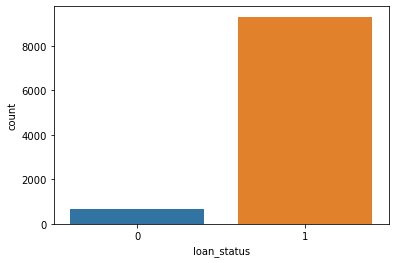

In [200]:
sns.countplot(data['loan_status'])

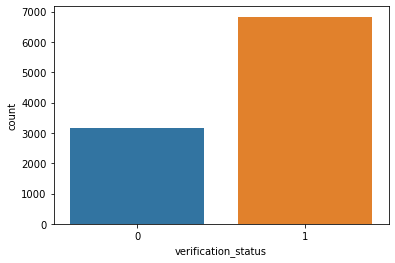

In [202]:
sns.countplot(data['verification_status'])

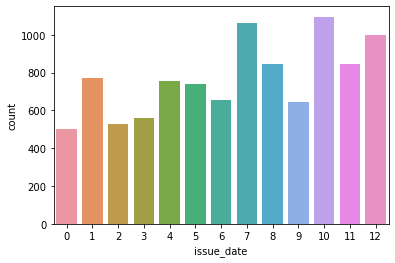

In [205]:
sns.countplot(data['issue_date'])

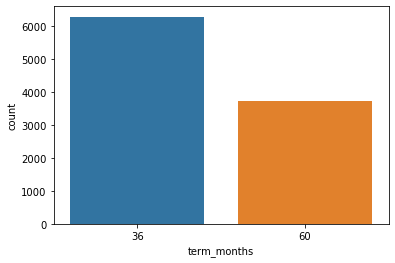

In [207]:
sns.countplot(data['term_months'])